# 1. Preparation 

In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [0]:
def plot_points(X, y):
    admitted = X[np.argwhere(y==1)]
    rejected = X[np.argwhere(y==0)]
    plt.scatter([s[0][0] for s in rejected], [s[0][1] for s in rejected], s = 25, color = 'blue', edgecolor = 'k')
    plt.scatter([s[0][0] for s in admitted], [s[0][1] for s in admitted], s = 25, color = 'red', edgecolor = 'k')

def display(m, b, color='g--'):
    plt.xlim(-0.05,1.05)
    plt.ylim(-0.05,1.05)
    x = np.arange(-10, 10, 0.1)
    plt.plot(x, m*x+b, color)

# 2. Mengenal Dataset


In [0]:
dataframe = pd.read_csv('example_data.csv')



In [8]:
dataframe.head(10)

,x1,x2,y
0,0.78051,-0.063669,1
1,0.28774,0.291390,1
2,0.40714,0.178780,1
3,0.29230,0.421700,1
4,0.50922,0.352560,1
5,0.27785,0.108020,1
6,0.27527,0.332230,1
7,0.43999,0.312450,1
8,0.33557,0.429840,1
9,0.23448,0.249860,1


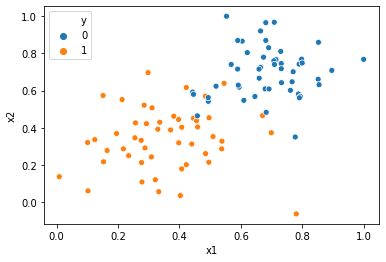

In [12]:
sns.scatterplot(x='x1', y='x2', data=dataframe, hue='y')



# inisiasi tipe data, konversi data, dll

In [0]:
x = np.array(dataframe[['x1','x2']])
y = np.array(dataframe['y'])

# 3. Memperisapkan Function

1.   Sigmoid Function
2.   Prediction (y hat)
3.   Error Function (Cross Entropy)
4.   Gradient Descent



In [0]:
def sigmoid(s):
  return 1/(1+np.exp(-s))

In [0]:
def predict(features, weights, bias):
  s = np.dot(features, weights)+bias #berapapun dimensinya dengan mudah dihitung dengan metode ini
  return sigmoid(s) #hasil dari perhitungan predict akan langsung dihitung ke sigmoid

In [0]:
def error_formula(y, prediction): #cross entropy
 return -y*np.log(prediction) - (1-y)*np.log(1-prediction) #setelah ini baru dikali negative


In [34]:
error_formula(1, 0.7) #e.g apabila nilai prediction semakin mendekati ke label maka nilai error akan semakin kecil

0.35667494393873245

In [0]:
def gradient_descent(x, y, predictions, weights, bias, learningrate):

  #menghitung selisih 
  delta_error = y-predictions

  #ada ketidakcocokan dimensi antara delta_error dengan x
  #maka delta_error di reshape
  delta_error = delta_error.reshape([100,1])

  #karena dalam rangka untuk turun dari error yang ada, maka weight dan bias akan terus 
  #diupdate dengan rasio penurunannya ditentukan seberapa besar/kecil learningratenya
  weights = weights + np.sum(learningrate * delta_error * x , axis=0)
  bias = bias + np.sum(learningrate*delta_error , axis = 0)
  
  return weights, bias #mengembalikan nilai weights, bias yang baru

# 4. Implementasi ANN

1.   inisialisasi variabel yang dibutuhkan
2.   hitung prediction
3.   hitung error
4.   update weight dan bias (gradient descent)
5.   visualisasi hasil
6.   ulangi langkah 2-5 hingga eror mengecil 


In [0]:
# inisialisasi variabel
weights = np.random.rand(2) #pembangkitan nilai acak pada weight
bias = 0

learningrate = 0.01

#epoch merupakan jumlah iterasi yang digunakan dalam training, 
#ibaratnya berapa kali dia belajar/ mengulangi proses yang sama
epoch = 100 #iterasi

epoch = 00, loss = 0.212
epoch = 01, loss = 0.212
epoch = 02, loss = 0.212
epoch = 03, loss = 0.211
epoch = 04, loss = 0.211
epoch = 05, loss = 0.211
epoch = 06, loss = 0.211
epoch = 07, loss = 0.211
epoch = 08, loss = 0.210
epoch = 09, loss = 0.210
epoch = 10, loss = 0.210
epoch = 11, loss = 0.210
epoch = 12, loss = 0.209
epoch = 13, loss = 0.209
epoch = 14, loss = 0.209
epoch = 15, loss = 0.209
epoch = 16, loss = 0.208
epoch = 17, loss = 0.208
epoch = 18, loss = 0.208
epoch = 19, loss = 0.208
epoch = 20, loss = 0.208
epoch = 21, loss = 0.207
epoch = 22, loss = 0.207
epoch = 23, loss = 0.207
epoch = 24, loss = 0.207
epoch = 25, loss = 0.207
epoch = 26, loss = 0.206
epoch = 27, loss = 0.206
epoch = 28, loss = 0.206
epoch = 29, loss = 0.206
epoch = 30, loss = 0.206
epoch = 31, loss = 0.205
epoch = 32, loss = 0.205
epoch = 33, loss = 0.205
epoch = 34, loss = 0.205
epoch = 35, loss = 0.205
epoch = 36, loss = 0.204
epoch = 37, loss = 0.204
epoch = 38, loss = 0.204
epoch = 39, loss = 0.204


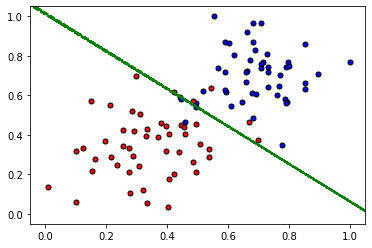

In [45]:
for i in range(epoch): #perulangan dalam pembelajaran/iterasi

  #hitung prediksi
  predictions = predict(x,weights, bias)

  loss = np.mean(error_formula(y, predictions))
  
  #dengan nilai weights dan bias yang baru setiap iterasinya (updated value weights & bias)
  weights, bias = gradient_descent(x,y,predictions, weights, bias, learningrate) 
  
  #visualisasi 
  display(-weights[0]/weights[1], -bias/weights[1])

  print('epoch = %02d, loss = %.3f' % (i, loss))

#visualisasi hasil akhir
display(-weights[0]/weights[1], -bias/weights[1])
plot_points(x,y)



#hasil diatas itu sudah epoch yang ke 300 karena saya sudah me-run 3 kali :)